<a href="https://colab.research.google.com/github/timurka43/python-machine-learning-workshop/blob/main/Numpy_and_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy Notebook
The content of this notebook is largely based upon the notebook originally written by [Justin Johnson](https://web.eecs.umich.edu/~justincj/), [Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/), [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335), and Kevin Zakka. It runs Python3 by default.

To use Numpy, we first need to import the `numpy` package:

In [ ]:
import numpy as np

### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

The `shape()` array method gives the shape of the array (the width by the height), as shown in the following example.

In [ ]:
# Create a rank 1 array

a = np.array([1, 2, 3])
print(a.shape, a[0], a[1], a[2])

In [ ]:
# Change an element of the array

a[0] = 5
print(a)

In [ ]:
# Create a rank 2 array

b = np.array([[1,2,3],[4,5,6]])
print(b)

In [ ]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [ ]:
# Create an array of all zeros

a = np.zeros((2,2))
print(a)

[[0. 0.]
 [0. 0.]]


In [ ]:
# Create a constant array

b = np.full((2,2), 7)
print(b)

[[7 7]
 [7 7]]


In [ ]:
# Create a 2x2 identity matrix

c = np.eye(2)
print(c)

[[1. 0.]
 [0. 1.]]


In [ ]:
# Create an array filled with random values

d = np.random.random((2,2))
print(d)

[[0.8690054  0.57244319]
 [0.29647245 0.81464494]]


### Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

#### View Solution



In [ ]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

### Exercise

In [ ]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]

# name your array my_array
my_array =

In [ ]:
# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]

sliced_my_array = my_array[:2, 1:3]
print(sliced_my_array)

[[2 3]
 [6 7]]


[link text](https://)A slice of an array is a view into the same data, so modifying it will modify the original array.

In [ ]:
print(my_array[0, 1])

sliced_my_array[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(my_array[0, 1])

2
77


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [ ]:
row_r1 = my_array[1, :]    # Rank 1 view of the second row of a
row_r2 = my_array[1:2, :]  # Rank 2 view of the second row of a

print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [ ]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]

print(col_r1, col_r1.shape)

print(col_r2, col_r2.shape)

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [ ]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [ ]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [ ]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

###Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)

print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [ ]:
# Elementwise difference; both produce the array
print(x - y)

print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [ ]:
# Elementwise product; both produce the array
print(x * y)

print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [ ]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)

print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [ ]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


You can also use the `@` operator which is equivalent to numpy's `dot` operator.

In [ ]:
print(v @ w)

219


In [ ]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

[29 67]
[29 67]
[29 67]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [ ]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

# Pandas Notebook
## Read and inspect tabular data

To start using `pandas`, we first import it and give it as the alias `pd`.

Run the code cell below. To run a code cell in Jupyter Notebook, click in the gray cell and press **Shift + Enter** (Windows) or **Shift + Return** (Mac).

In [ ]:
import pandas as pd

We will be using the **IRIS Dataset** from https://gist.github.com/netj/8836201#file-iris-csv for the examples in this notebook.

Read in its CSV file using `pandas` and call the dataset `impact`:

In [ ]:
iris = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")


`pandas` can also read *and write* many other types of files, like:

- CSV files: `read_csv()` and `to_csv()`
- Excel files: `read_excel()` and `to_excel()`
- SAS data files: `read_sas()`
- SPSS data files: `read_spss()`
- Stata data files: `read_stata()` and `to_stata()`

To see a summary of the `iris` dataset:

In [ ]:
iris.info()

In [ ]:
# Lets look at the shape of the dataframe

iris.shape

In [ ]:
# To see the first few rows of iris, use head()

iris.head()

In [ ]:
# To see the last few rows of iris, use head()

iris.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [ ]:
# To see the first few rows AND last few rows of iris, just print the dataframe

iris

# Sneak Peak
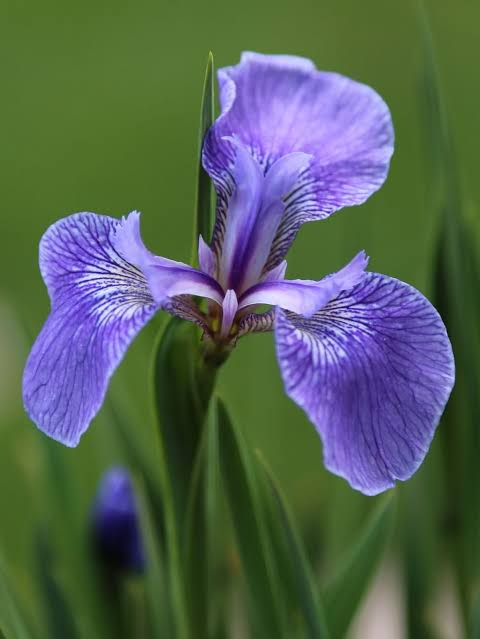

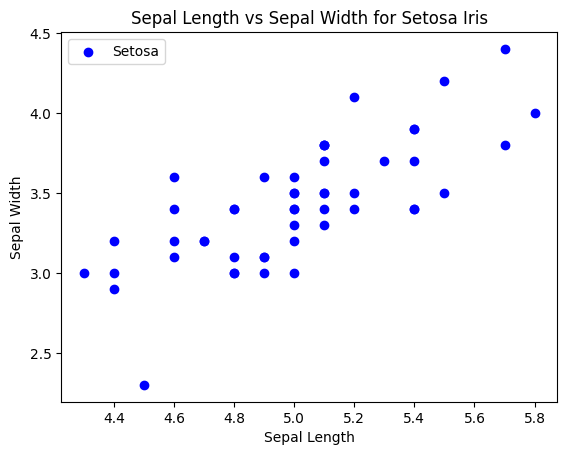

In [ ]:
import matplotlib.pyplot as plt

setosa = iris[iris["variety"] == "Setosa"]
plt.scatter(setosa['sepal.length'], setosa['sepal.width'], c='blue', label='Setosa')

# Set labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width for Setosa Iris')

# Show the legend
plt.legend()

# Display the plot
plt.show()